In [401]:
import pandas as pd

In [402]:
def cleanUser(user):
    return user.replace('DTAA/', '')

In [403]:
emailDf = pd.read_csv('r4.1/email.csv', nrows=10)

In [404]:
emailDf.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{C0K9-N2TG12WK-3772OEPN},01/02/2010 06:50:45,LRG0155,PC-0450,Rafael.H.Mccall@netzero.com,NaN,Lysandra_Guerrero@netzero.com,Lysandra_Guerrero@netzero.com,29918,0,apple lot mundane response dark who is ralbovs...
1,{F5Y9-A8ON18GE-5541BCZB},01/02/2010 07:05:31,KAB0942,PC-8686,Ali.Cole.Mclaughlin@dtaa.com,Karly.Amity.Bentley@dtaa.com,NaN,Karly.Amity.Bentley@dtaa.com,22235,0,again 15 bought always avoided reaching joined...
2,{I8R9-T8NW12WZ-6603QAOH},01/02/2010 07:06:46,KAB0942,PC-8686,Brent.Colorado.Sanders@dtaa.com,NaN,Karly.Amity.Bentley@dtaa.com,Karly.Amity.Bentley@dtaa.com,54903,0,evers guns what decided baltimore forced docto...
3,{K1Z8-V3QS79OJ-1650RODD},01/02/2010 07:16:05,ECM0654,PC-7356,Lane.L.Clay@optonline.net,NaN,Martin-Erica@netzero.com,Martin-Erica@netzero.com,21294,0,method knew million took freeeasy four left ro...
4,{E2B2-Z6AA12HB-1496LJRN},01/02/2010 07:16:29,ECM0654,PC-7356,Abigail_Tyson@comcast.net,Martin-Erica@netzero.com,NaN,Martin-Erica@netzero.com,25360,0,new india established size inflicting frontier...


In [405]:
emailDf.sort_values(by=['date'], inplace=True, ascending=False)

In [406]:
emailDf.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
9,{E2M5-J2NE69MC-8025XXWY},01/02/2010 07:28:40,CPM0326,PC-4173,Francis.Colin.Guthrie@dtaa.com,Kalia.Jasmine.Humphrey@dtaa.com,NaN,Cara.Paula.Macias@dtaa.com,23776,0,meheux owned nine 4 aggregate spider reactions...
8,{U6D0-I9TF90XM-7443XRJL},01/02/2010 07:28:27,CCM0732,PC-2307,Patrick.Benjamin.Wilson@dtaa.com,Christen.Cameron.Manning@dtaa.com,NaN,Christen.Cameron.Manning@dtaa.com,32016,0,intelligence position severed leg around deser...
7,{Y8Y7-M5AA17UV-2071IKMN},01/02/2010 07:28:19,CCM0732,PC-2307,TBZ91@harris.com,Christen.Cameron.Manning@dtaa.com,NaN,Christen.Cameron.Manning@dtaa.com,21815,1,thus january black days contenders life based ...
6,{Y3S2-S4KJ64SS-3854YCPC},01/02/2010 07:27:47,CCM0732,PC-2307,Orli.Roanna.Holt@dtaa.com,NaN,Christen.Cameron.Manning@dtaa.com,Christen.Cameron.Manning@dtaa.com,25978,0,perceive attitude launched m some small holdin...
5,{M1U1-B1OB89CI-7573ODUK},01/02/2010 07:16:37,BHV0556,PC-6254,Leandra.Vivien.Garcia@dtaa.com;Freya.Brielle.M...,Nicole.Meredith.Pittman@dtaa.com,NaN,Byron.Hiram.Vega@dtaa.com,36417,0,humour samuel involved last dispensed exclaims...


In [407]:
emailDf.describe()

,size,attachments
count,10.00000,10.000000
mean,29371.20000,0.100000
std,10225.14618,0.316228
min,21294.00000,0.000000
25%,22620.25000,0.000000
50%,25669.00000,0.000000
75%,31491.50000,0.000000
max,54903.00000,1.000000


According to dataset, We can say that we have date, size, attachment as numerical dataset and others as string. So we are converting them to categorical dataset. But before that we have to NLP so that we can generate the vectorized matrix from the data.

for this task we have 3 pipelines.
- NLP Processing for our unstruvtured data
- Modeling & Predictions


In [408]:
emailDf['content'].head()

9    meheux owned nine 4 aggregate spider reactions...
8    intelligence position severed leg around deser...
7    thus january black days contenders life based ...
6    perceive attitude launched m some small holdin...
5    humour samuel involved last dispensed exclaims...
Name: content, dtype: object

### NLP Processing for our unstruvtured data

Now we have our four features but by observing above table we have some string data available and as we know that machines can not understand these strings so we have transform these string respresented data in to numerical form.

To do NLP on title, we have to follow the particular pipeline to get the major words from the content.
We are applying pipeline given as below.

- REMOVE PUNCTUATION
- TOKENIZATION
- REMOVING STOPWORDS
- STEMMING (IF NEEDED TO IMPROVE ACCURACY)
- VECTORIZING

#####  Remove Punctuation

In this method, We are removing all the following the punctuations from content

In [409]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [410]:
def remove_punc(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [411]:
''' python is case sensetive for that A and a is diffrent thats why lower()'''
emailDf['content_punc'] = emailDf['content'].apply(lambda x: remove_punc(x.lower()))
print(emailDf.head())

                         id                 date     user       pc  \
9  {E2M5-J2NE69MC-8025XXWY}  01/02/2010 07:28:40  CPM0326  PC-4173   
8  {U6D0-I9TF90XM-7443XRJL}  01/02/2010 07:28:27  CCM0732  PC-2307   
7  {Y8Y7-M5AA17UV-2071IKMN}  01/02/2010 07:28:19  CCM0732  PC-2307   
6  {Y3S2-S4KJ64SS-3854YCPC}  01/02/2010 07:27:47  CCM0732  PC-2307   
5  {M1U1-B1OB89CI-7573ODUK}  01/02/2010 07:16:37  BHV0556  PC-6254   

                                                  to  \
9                     Francis.Colin.Guthrie@dtaa.com   
8                   Patrick.Benjamin.Wilson@dtaa.com   
7                                   TBZ91@harris.com   
6                          Orli.Roanna.Holt@dtaa.com   
5  Leandra.Vivien.Garcia@dtaa.com;Freya.Brielle.M...   

                                  cc                                bcc  \
9    Kalia.Jasmine.Humphrey@dtaa.com                                NaN   
8  Christen.Cameron.Manning@dtaa.com                                NaN   
7  Christen.Camer

#####  Tokenization
Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

In [412]:
import re


def tokenize(text):
    # Split word non word
    tokens = re.split('\W+', text)
    return tokens

emailDf['content_tokenize'] = emailDf['content_punc'].apply(lambda x: tokenize(x))
print(emailDf.head())

                         id                 date     user       pc  \
9  {E2M5-J2NE69MC-8025XXWY}  01/02/2010 07:28:40  CPM0326  PC-4173   
8  {U6D0-I9TF90XM-7443XRJL}  01/02/2010 07:28:27  CCM0732  PC-2307   
7  {Y8Y7-M5AA17UV-2071IKMN}  01/02/2010 07:28:19  CCM0732  PC-2307   
6  {Y3S2-S4KJ64SS-3854YCPC}  01/02/2010 07:27:47  CCM0732  PC-2307   
5  {M1U1-B1OB89CI-7573ODUK}  01/02/2010 07:16:37  BHV0556  PC-6254   

                                                  to  \
9                     Francis.Colin.Guthrie@dtaa.com   
8                   Patrick.Benjamin.Wilson@dtaa.com   
7                                   TBZ91@harris.com   
6                          Orli.Roanna.Holt@dtaa.com   
5  Leandra.Vivien.Garcia@dtaa.com;Freya.Brielle.M...   

                                  cc                                bcc  \
9    Kalia.Jasmine.Humphrey@dtaa.com                                NaN   
8  Christen.Cameron.Manning@dtaa.com                                NaN   
7  Christen.Camer

So we got the our tokenized column as "content_tokenize"

##### Remove StepWords

StepWords are those which are words which does not play importance in sentences.
Like I am going to watch movie. where 'I', 'am' and 'to' plays part of the stopwords.

Here we will use nltk package to remvoe stopwords.

In [413]:
import nltk
print('NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)')

print('UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED')
#nltk.download()
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)
UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED


In [414]:
emailDf['content_remove_stopwords'] = emailDf['content_tokenize'].apply(lambda x: remove_stopwords(x))
print(emailDf.head())

                         id                 date     user       pc  \
9  {E2M5-J2NE69MC-8025XXWY}  01/02/2010 07:28:40  CPM0326  PC-4173   
8  {U6D0-I9TF90XM-7443XRJL}  01/02/2010 07:28:27  CCM0732  PC-2307   
7  {Y8Y7-M5AA17UV-2071IKMN}  01/02/2010 07:28:19  CCM0732  PC-2307   
6  {Y3S2-S4KJ64SS-3854YCPC}  01/02/2010 07:27:47  CCM0732  PC-2307   
5  {M1U1-B1OB89CI-7573ODUK}  01/02/2010 07:16:37  BHV0556  PC-6254   

                                                  to  \
9                     Francis.Colin.Guthrie@dtaa.com   
8                   Patrick.Benjamin.Wilson@dtaa.com   
7                                   TBZ91@harris.com   
6                          Orli.Roanna.Holt@dtaa.com   
5  Leandra.Vivien.Garcia@dtaa.com;Freya.Brielle.M...   

                                  cc                                bcc  \
9    Kalia.Jasmine.Humphrey@dtaa.com                                NaN   
8  Christen.Cameron.Manning@dtaa.com                                NaN   
7  Christen.Camer

Now we will create one method which will do the all the 3 steps in one shot.

In [415]:
def clean_text(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    text = [word for word in tokens if word not in stopword]
    return text

df = pd.read_csv('r4.1/email.csv', nrows=10)
df['content'] = df['content'].apply(lambda x: clean_text(x.lower()))


In [416]:
df.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{C0K9-N2TG12WK-3772OEPN},01/02/2010 06:50:45,LRG0155,PC-0450,Rafael.H.Mccall@netzero.com,NaN,Lysandra_Guerrero@netzero.com,Lysandra_Guerrero@netzero.com,29918,0,"[apple, lot, mundane, response, dark, ralbovsk..."
1,{F5Y9-A8ON18GE-5541BCZB},01/02/2010 07:05:31,KAB0942,PC-8686,Ali.Cole.Mclaughlin@dtaa.com,Karly.Amity.Bentley@dtaa.com,NaN,Karly.Amity.Bentley@dtaa.com,22235,0,"[15, bought, always, avoided, reaching, joined..."
2,{I8R9-T8NW12WZ-6603QAOH},01/02/2010 07:06:46,KAB0942,PC-8686,Brent.Colorado.Sanders@dtaa.com,NaN,Karly.Amity.Bentley@dtaa.com,Karly.Amity.Bentley@dtaa.com,54903,0,"[evers, guns, decided, baltimore, forced, doct..."
3,{K1Z8-V3QS79OJ-1650RODD},01/02/2010 07:16:05,ECM0654,PC-7356,Lane.L.Clay@optonline.net,NaN,Martin-Erica@netzero.com,Martin-Erica@netzero.com,21294,0,"[method, knew, million, took, freeeasy, four, ..."
4,{E2B2-Z6AA12HB-1496LJRN},01/02/2010 07:16:29,ECM0654,PC-7356,Abigail_Tyson@comcast.net,Martin-Erica@netzero.com,NaN,Martin-Erica@netzero.com,25360,0,"[new, india, established, size, inflicting, fr..."


##### Vectorizing

Now we have to create one vector of this tokenize words so that we can easily fit this with our features so that we can easily create classification model to achieve our target.


In [417]:
# import dask.dataframe as dd
# df = dd.read_csv('r4.1/email.csv')
# type(df)

In [418]:
# df = df.compute()

# start

In [419]:

df = pd.read_csv('r4.1/email.csv', nrows=700)
df.head(1)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{C0K9-N2TG12WK-3772OEPN},01/02/2010 06:50:45,LRG0155,PC-0450,Rafael.H.Mccall@netzero.com,NaN,Lysandra_Guerrero@netzero.com,Lysandra_Guerrero@netzero.com,29918,0,apple lot mundane response dark who is ralbovs...


In [420]:
df.shape

(700, 11)

In [421]:
from sklearn.feature_extraction.text import CountVectorizer

# df.sort_values(by=['date'], inplace=True, ascending=False)
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(df['content'])

X_counts.shape

(700, 9041)

In [422]:
pd.DataFrame(X_counts[1].toarray())

,0,1,2,3,4,5,6,7,8,9,...,9031,9032,9033,9034,9035,9036,9037,9038,9039,9040
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [423]:
# del df
##Vectorizing output sparse matrix
X_counts_df = pd.DataFrame(X_counts.toarray())

##Assinging Names
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df.head()

,00,006,03f,05,06,07,07p,08,09,1,...,yukon,zealand,zenith,zero,zone,zoning,zoo,zoological,zum,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
X_counts_df.shape

(700, 9041)

finally we got our vectorized matrix for title column in X_counts_df dataframe. Now we need to join other columns to these data frame

In [425]:
df['to'].head()

0        Rafael.H.Mccall@netzero.com
1       Ali.Cole.Mclaughlin@dtaa.com
2    Brent.Colorado.Sanders@dtaa.com
3          Lane.L.Clay@optonline.net
4          Abigail_Tyson@comcast.net
Name: to, dtype: object

In [426]:
print(X_counts_df.shape)
print(df.shape)

(700, 9041)
(700, 11)


creating one method to process the email id as taking the id before the @ and converting all to lowercase.

In [427]:
def clean_email(text):
    return str(text).lower().split('@', 1)[0]

In [428]:
df['to'] = df['to'].apply(lambda x: clean_email(x))
print(df['to'].head())

0           rafael.h.mccall
1       ali.cole.mclaughlin
2    brent.colorado.sanders
3               lane.l.clay
4             abigail_tyson
Name: to, dtype: object


Taking nan also as name to process null values

In [429]:
df['cc'] = df['cc'].apply(lambda x: clean_email(x))
df['cc'].head()

0                    nan
1    karly.amity.bentley
2                    nan
3                    nan
4           martin-erica
Name: cc, dtype: object

In [430]:
df['bcc'] = df['bcc'].apply(lambda x: clean_email(x))
df['from'] = df['from'].apply(lambda x: clean_email(x))


In [431]:
df.head()

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{C0K9-N2TG12WK-3772OEPN},01/02/2010 06:50:45,LRG0155,PC-0450,rafael.h.mccall,nan,lysandra_guerrero,lysandra_guerrero,29918,0,apple lot mundane response dark who is ralbovs...
1,{F5Y9-A8ON18GE-5541BCZB},01/02/2010 07:05:31,KAB0942,PC-8686,ali.cole.mclaughlin,karly.amity.bentley,nan,karly.amity.bentley,22235,0,again 15 bought always avoided reaching joined...
2,{I8R9-T8NW12WZ-6603QAOH},01/02/2010 07:06:46,KAB0942,PC-8686,brent.colorado.sanders,nan,karly.amity.bentley,karly.amity.bentley,54903,0,evers guns what decided baltimore forced docto...
3,{K1Z8-V3QS79OJ-1650RODD},01/02/2010 07:16:05,ECM0654,PC-7356,lane.l.clay,nan,martin-erica,martin-erica,21294,0,method knew million took freeeasy four left ro...
4,{E2B2-Z6AA12HB-1496LJRN},01/02/2010 07:16:29,ECM0654,PC-7356,abigail_tyson,martin-erica,nan,martin-erica,25360,0,new india established size inflicting frontier...


In [432]:
str(df.shape) + ' - ' + str(X_counts_df.shape)

'(700, 11) - (700, 9041)'

In [433]:
X_counts_df['date'] = list(df['date'])
X_counts_df['user'] = list(df['user'])
X_counts_df['pc'] = list(df['pc'])
X_counts_df['to'] = list(df['to'])
X_counts_df['from'] = list(df['from'])
X_counts_df['cc'] = list(df['cc'])
X_counts_df['bcc'] = list(df['bcc'])

In [434]:
str(df.shape) + ' - ' + str(X_counts_df.shape)

'(700, 11) - (700, 9047)'

In [435]:
df.head(2)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{C0K9-N2TG12WK-3772OEPN},01/02/2010 06:50:45,LRG0155,PC-0450,rafael.h.mccall,nan,lysandra_guerrero,lysandra_guerrero,29918,0,apple lot mundane response dark who is ralbovs...
1,{F5Y9-A8ON18GE-5541BCZB},01/02/2010 07:05:31,KAB0942,PC-8686,ali.cole.mclaughlin,karly.amity.bentley,nan,karly.amity.bentley,22235,0,again 15 bought always avoided reaching joined...


Now merging the cleaned features to our vector matrix except "id" column which is not relevant

In [436]:
dfd = pd.get_dummies(X_counts_df['pc'])


In [437]:
dfd.head()

,PC-0218,PC-0450,PC-0859,PC-1083,PC-1278,PC-1405,PC-1550,PC-1626,PC-1735,PC-1739,...,PC-8152,PC-8332,PC-8595,PC-8686,PC-8773,PC-9009,PC-9195,PC-9764,PC-9869,PC-9881
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [438]:
X_counts_df.head()

,00,006,03f,05,06,07,07p,08,09,1,...,zoo,zoological,zum,zur,user,pc,to,from,cc,bcc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,LRG0155,PC-0450,rafael.h.mccall,lysandra_guerrero,nan,lysandra_guerrero
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,KAB0942,PC-8686,ali.cole.mclaughlin,karly.amity.bentley,karly.amity.bentley,nan
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,KAB0942,PC-8686,brent.colorado.sanders,karly.amity.bentley,nan,karly.amity.bentley
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,ECM0654,PC-7356,lane.l.clay,martin-erica,nan,martin-erica
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,ECM0654,PC-7356,abigail_tyson,martin-erica,martin-erica,nan


In [439]:
del X_counts_df['pc']
X_counts_df = pd.concat([X_counts_df, dfd], axis=1)

In [440]:
X_counts_df.head()

,00,006,03f,05,06,07,07p,08,09,1,...,PC-8152,PC-8332,PC-8595,PC-8686,PC-8773,PC-9009,PC-9195,PC-9764,PC-9869,PC-9881
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


making one common method for merging one hot columns

In [441]:
import gc
def merge_one_hot_cols(X_counts_df, columns):
    for col in columns:
        dfd = pd.get_dummies(X_counts_df[col])
        del X_counts_df[col]
        X_counts_df = pd.concat([X_counts_df, dfd], axis=1)
        gc.collect()
    return X_counts_df



In [442]:
X_counts_df = merge_one_hot_cols(X_counts_df, ['user', 'to', 'from', 'cc', 'bcc'])

In [443]:
X_counts_df.head()

,00,006,03f,05,06,07,07p,08,09,1,...,robert_mcfarland,shelly.amy.morin,skyler.paula.whitehead,stuart.sawyer.ward,sydney.amela.tillman,sydney_tillman,wcr9138,willa.myra.flowers,william.casey.ramsey,zorita.phoebe.griffith
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
X_counts_df['date']
X_counts_df['date'].head()


0    01/02/2010 06:50:45
1    01/02/2010 07:05:31
2    01/02/2010 07:06:46
3    01/02/2010 07:16:05
4    01/02/2010 07:16:29
Name: date, dtype: object

In [445]:
from datetime import datetime

In [446]:

year = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).year
month = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).month
day = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).day
hour = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).hour
minute = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).minute
second = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S" ).second
X_counts_df['year'] = X_counts_df['date'].map(year)
X_counts_df['month'] = X_counts_df['date'].map(month)
X_counts_df['day'] = X_counts_df['date'].map(day)
X_counts_df['hour'] = X_counts_df['date'].map(hour)
X_counts_df['minute'] = X_counts_df['date'].map(minute)
X_counts_df['second'] = X_counts_df['date'].map(second)

del X_counts_df['date']

In [447]:
from sklearn.preprocessing import MinMaxScaler
from anamoly.keras_anomaly_detection.library.plot_utils import visualize_reconstruction_error
from anamoly.keras_anomaly_detection.library.recurrent import LstmAutoEncoder, CnnLstmAutoEncoder

In [448]:
X_counts_df.head()

,00,006,03f,05,06,07,07p,08,09,1,...,robert_mcfarland,shelly.amy.morin,skyler.paula.whitehead,stuart.sawyer.ward,sydney.amela.tillman,sydney_tillman,wcr9138,willa.myra.flowers,william.casey.ramsey,zorita.phoebe.griffith
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [449]:
X_np_data = X_counts_df.as_matrix()
scaler = MinMaxScaler()
X_np_data = scaler.fit_transform(X_np_data)
print(X_np_data.shape)

(700, 10109)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [450]:
data_dir_path = './data'
model_dir_path = './models'
ae = CnnLstmAutoEncoder()

In [451]:

# fit the data and save model into model_dir_path
ae.fit(X_np_data, model_dir_path=model_dir_path, estimated_negative_sample_ratio=0.9)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 10109, 256)        1536      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2527, 256)         0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dense_7 (Dense)              (None, 10109)             657085    
Total params: 740,797
Trainable params: 740,797
Non-trainable params: 0
_________________________________________________________________
None
Train on 560 samples, validate on 140 samples
Epoch 1/20
560/560 [==============================] - 74s 133ms/step - loss: 0.0043 - mean_absolute_error: 0.0077 - val_loss: 0.0040 - val_mean_absolute_error: 0.0095
Epoch 2/20
560/560 [==============================

In [454]:
# load back the model saved in model_dir_path detect anomaly
# ae.load_model(model_dir_path)
anomaly_information = ae.anomaly(X_np_data)
reconstruction_error = []
for idx, (is_anomaly, dist) in enumerate(anomaly_information):
    print('# ' + str(idx) + ' is ' + ('abnormal' if is_anomaly else 'normal') + ' (dist: ' + str(dist) + ')')
    reconstruction_error.append(dist)

# 0 is normal (dist: 5.9817312246992245)
# 1 is normal (dist: 5.904331395184364)
# 2 is abnormal (dist: 7.36744469465329)
# 3 is normal (dist: 5.280364564067363)
# 4 is normal (dist: 5.907169702857858)
# 5 is normal (dist: 6.65018665416697)
# 6 is normal (dist: 7.043133361898429)
# 7 is normal (dist: 6.3713099818709535)
# 8 is normal (dist: 6.49806726060102)
# 9 is abnormal (dist: 7.239656680466587)
# 10 is normal (dist: 6.314135451106418)
# 11 is normal (dist: 5.440445808181616)
# 12 is normal (dist: 6.92034789156924)
# 13 is normal (dist: 6.328409637503511)
# 14 is normal (dist: 6.482041348388695)
# 15 is normal (dist: 6.5117565394220716)
# 16 is normal (dist: 5.542595149438701)
# 17 is normal (dist: 6.147775508683022)
# 18 is normal (dist: 6.073842230362561)
# 19 is normal (dist: 6.32379317573495)
# 20 is normal (dist: 6.169632757688445)
# 21 is normal (dist: 5.518789231416086)
# 22 is normal (dist: 5.654513440326345)
# 23 is normal (dist: 6.906303579264014)
# 24 is normal (dist: 6.

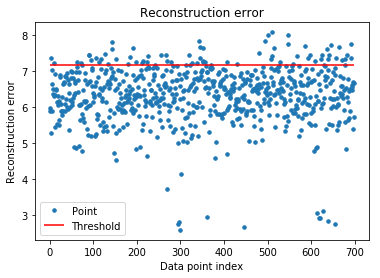

In [455]:
visualize_reconstruction_error(reconstruction_error, ae.threshold)